In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer

In [2]:
with open('/Users/travelingshoes/Desktop/final_project_github/Weather data/Morgan_Weather_Data.xlsx', 'r', encoding='utf-8', errors='ignore') as f:
    data = f.read()

# Read in data from CSV file
salt_lake_data = pd.ExcelFile("Salt_Lake_Weather_Data.xlsx")

# Get the sheets
salt_lake_data.sheet_names

['Sheet1']

In [3]:
# Get the morgan_info from the crowdfunding_info worksheet. 
salt_lake_info_df = pd.read_excel(salt_lake_data, sheet_name='Sheet1')
salt_lake_info_df.head()

,Date,Avg Salt Lake,Dry = 0 Flooded =1 Not = 2,Atwater (1308) Snow Water Equivalent (in) Start of Day Values,Brighton (366) Snow Water Equivalent (in) Start of Day Values,Dry Fork (906) Snow Water Equivalent (in) Start of Day Values,Lookout Peak (596) Snow Water Equivalent (in) Start of Day Values,Louis Meadow (972) Snow Water Equivalent (in) Start of Day Values,Mill-D North (628) Snow Water Equivalent (in) Start of Day Values,Parleys Upper (856) Snow Water Equivalent (in) Start of Day Values,...,Salt Lake CityRain_sum (inch),Salt Lake CitySnowfall_sum (inch),Salt Lake CityWindspeed_10m_max (mp/h),SnowbirdTemp_Max (°F),SnowbirdTemp_min (°F),SnowbirdTemp_mean (°F),SnowbirdPrecipitation_sum (inch),SnowbirdRain_sum (inch),SnowbirdSnowfall_sum (inch),SnowbirdWindspeed_10m_max (mp/h)
0,1982-10-01,94.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.076,1.216,5.9,49.0,37.8,42.9,0.024,0.024,0.0,7.2
1,1982-10-02,94.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0.000,3.6,57.0,35.7,46.2,0.000,0.000,0.0,5.5
2,1982-10-03,95.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0.000,5.7,63.0,36.9,49.5,0.000,0.000,0.0,9.1
3,1982-10-04,95.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.052,0.000,7.8,66.9,40.5,52.6,0.063,0.063,0.0,12.6
4,1982-10-05,95.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.131,1.324,6.5,48.5,39.8,44.1,0.323,0.323,0.0,8.1


In [4]:
salt_drop_lake_info_df = salt_lake_info_df.dropna()
print(salt_drop_lake_info_df)


            Date  Avg Salt Lake  Dry = 0 Flooded =1 Not = 2  \
14573 2022-08-25           62.0                           0   
14574 2022-08-26           62.0                           0   
14575 2022-08-27           62.0                           0   
14576 2022-08-28           61.0                           0   
14577 2022-08-29           61.0                           0   
...          ...            ...                         ...   
14787 2023-03-27           63.0                           0   
14788 2023-03-28           63.0                           0   
14789 2023-03-29           63.0                           0   
14790 2023-03-30           63.5                           0   
14791 2023-03-31           63.5                           0   

       Atwater (1308) Snow Water Equivalent (in) Start of Day Values  \
14573                                                0.0               
14574                                                0.0               
14575                      

In [5]:
X = salt_drop_lake_info_df[['Atwater (1308) Snow Water Equivalent (in) Start of Day Values', 'Brighton (366) Snow Water Equivalent (in) Start of Day Values', 'Dry Fork (906) Snow Water Equivalent (in) Start of Day Values', 'Lookout Peak (596) Snow Water Equivalent (in) Start of Day Values', 'Louis Meadow (972) Snow Water Equivalent (in) Start of Day Values', 'Mill-D North (628) Snow Water Equivalent (in) Start of Day Values', 'Parleys Upper (856) Snow Water Equivalent (in) Start of Day Values', 'Salt Lake CityRain_sum (inch)', 'Salt Lake CitySnowfall_sum (inch)', 'Salt Lake CityWindspeed_10m_max (mp/h)', 'SnowbirdTemp_Max (°F)', 'SnowbirdTemp_min (°F)', 'SnowbirdTemp_mean (°F)', 'SnowbirdPrecipitation_sum (inch)', 'SnowbirdRain_sum (inch)', 'SnowbirdSnowfall_sum (inch)', 'SnowbirdWindspeed_10m_max (mp/h)']]
y = salt_drop_lake_info_df[['Avg Salt Lake', 'Dry = 0 Flooded =1 Not = 2']]

In [6]:
#Training
X 

,Atwater (1308) Snow Water Equivalent (in) Start of Day Values,Brighton (366) Snow Water Equivalent (in) Start of Day Values,Dry Fork (906) Snow Water Equivalent (in) Start of Day Values,Lookout Peak (596) Snow Water Equivalent (in) Start of Day Values,Louis Meadow (972) Snow Water Equivalent (in) Start of Day Values,Mill-D North (628) Snow Water Equivalent (in) Start of Day Values,Parleys Upper (856) Snow Water Equivalent (in) Start of Day Values,Salt Lake CityRain_sum (inch),Salt Lake CitySnowfall_sum (inch),Salt Lake CityWindspeed_10m_max (mp/h),SnowbirdTemp_Max (°F),SnowbirdTemp_min (°F),SnowbirdTemp_mean (°F),SnowbirdPrecipitation_sum (inch),SnowbirdRain_sum (inch),SnowbirdSnowfall_sum (inch),SnowbirdWindspeed_10m_max (mp/h)
14573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008,0.000,6.4,88.4,60.9,75.2,0.004,0.004,0.000,6.5
14574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,7.2,87.6,62.1,75.5,0.000,0.000,0.000,7.1
14575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,9.0,88.7,60.6,76.1,0.000,0.000,0.000,8.8
14576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,9.4,85.8,68.7,76.7,0.000,0.000,0.000,8.9
14577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,6.9,90.5,59.6,76.9,0.000,0.000,0.000,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14787,65.3,38.6,21.6,45.0,34.2,49.3,39.8,0.000,0.580,5.4,29.5,18.1,22.7,0.016,0.000,0.112,3.2
14788,66.2,38.9,21.9,46.5,35.7,50.0,40.0,0.000,0.000,6.4,37.0,10.9,23.4,0.000,0.000,0.000,6.0
14789,66.2,38.9,21.9,46.5,35.7,50.0,40.0,0.012,0.496,12.1,44.6,23.5,33.5,0.166,0.162,0.028,9.6
14790,67.4,39.5,22.3,47.3,36.5,51.1,40.9,0.000,3.251,6.3,33.6,28.1,31.3,0.375,0.091,1.986,5.0


In [7]:
#Testing
y 

,Avg Salt Lake,Dry = 0 Flooded =1 Not = 2
14573,62.0,0
14574,62.0,0
14575,62.0,0
14576,61.0,0
14577,61.0,0
...,...,...
14787,63.0,0
14788,63.0,0
14789,63.0,0
14790,63.5,0


In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



In [11]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9246493563338805
Testing Score: 0.9473186366031237


ValueError: could not broadcast input array from shape (2,) into shape (1,)

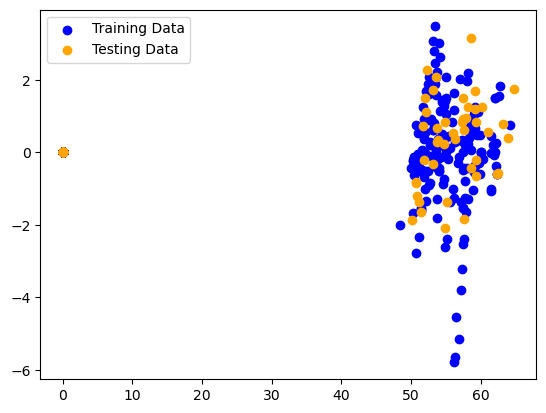

In [12]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()